In [2]:
# # Для работы в колабе раскоменьте эти строки
#!git clone https://github.com/HSE-LAMBDA/DeepGenerativeModels.git
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
%cd DeepGenerativeModels/

/home/rvzajtsev/DeepGenerativeModels


# Этап 1. Загрузка данных
В данном задании вам предстоит работать с уже знакомым датасетом с лицами и генерировать новые лица с заданными аттрибутами

In [3]:
#!pip install git+https://github.com/S-aiueo32/lpips-pytorch.git
# !pip install munch
# ### use this link: https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM 
# !wget --header="Host: doc-0s-bs-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_fg6okl80cf53e4nba6tqp20f9ppoksfb_nonce=8cv2ssik756o6" --header="Connection: keep-alive" "https://doc-0s-bs-docs.googleusercontent.com/docs/securesc/iarutqf0r1lqfugp0lndeeg868bj1357/7tqj7pba2k1955upa9n0tmsfljsu49s7/1676280975000/13182073909007362810/02032167923019213106/0B7EVK8r0v71pZjFTYXZWM3FlRnM?ax=AB85Z1A_YZqDSBqeoaECzI-rpyakYxMB-Lb-WYHY6VRR19zK80Uxu0Klt1oxtsDslc1-CfJBxBSIznQ4Jgg7vvi79ADHZsgtKKm2HTBHhQXiGPT-m1MD8BM2kCUytpi2j_rJ8h95ZQZEo8lZ7NUHhl3Pi_mHF22a6paObUeHdJJJINgt9X_KPGYSQ-3_SrZ5i_QCx_PJe7cnTTTbn0MdprjCdxANGn6Ym-6-DjZevqk4BkdSWx7_mhcbQAK59XaGEuWp-qaF7HCtLx87URCGBpQZJTmEG4hj8PNIIRdBE36IpLKrXEYmzH_qCnMEepDsodx25FcWzeuzBOVV4z0NqGZN-DKjNAHJBldoGpQxedEZsCreBei9T2thZLFINVhN3VMYP9m09oYnAJrWlgqrBSwK4mB2khXajrbvC5wjbi0GwwI8UX1-GsRfif0i-Brzua_6moWDf2kzgxzFWl7ay2c4j1OEhXDkRLcay3_xM3qhzj1-m7539xiWu4yylVJnVk88TGZwWup8uTZQ4V9TmswteHEj52RZPfkWBAWdEYmerQ_AV9TkyJdrQcEPca9UA1pF57frWbpUM9FAEnwJHwPAPc7EndoI6Hj3CKUdoS5pTMxXckSV4dbuaq6nXsCFO0Lg0yAhYHJnq370zS4-ri1vQBBKbyonqzVhBVZxFDl4gpGrgd1UZOfoSzvDvZj_H4jUvMpavE-u1SnG_V-h4rtiMMHinP0D7rJEVP3o3mogAMx0LI8GCBGOOAf3FYIbU1mIw81lDiTNaSho1d1iRS8Aekw4QL5kanCkLH98HdiZ2fHn9i7bMePDgx-q9qUfRhRceKSM_Ksvz5kRyrNgCQsqnO-IJr4XYx4p6ztVavR9xKc4RiWF4S2rKUDeyfA&uuid=a993f58c-849a-4c75-8284-80c039f86119&authuser=0&nonce=8cv2ssik756o6&user=02032167923019213106&hash=gstoicudtgdqsrhjtv8n0n5d5mtf2r49" -c -O 'img_align_celeba.zip'
# !wget https://raw.githubusercontent.com/taki0112/StarGAN-Tensorflow/master/dataset/celebA/list_attr_celeba.txt

In [4]:
#import sys; sys.path.append('../../utils/')
# from utils.datasets.celeba import CelebADataset
# import torch
# import torch.nn.functional as F
#from lpips_pytorch import LPIPS
# from torchvision import transforms
# from munch import Munch
# import gc
# from tqdm.auto import trange
# ## Setup
# # Number of gpus available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# args = Munch()

# # args.num_domains = ??? # Задайте число доменов
# args.batch_size=8
# # Spatial size of training images, images are resized to this size.
# args.img_size = 64

# # Transformations to be applied to each individual image sample
# transform=transforms.Compose([
#     transforms.Resize(args.img_size),
#     transforms.CenterCrop(args.img_size),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                           std=[0.229, 0.224, 0.225])
# ])
# # Load the dataset from file and apply transformations
# dataset = CelebADataset(transform=transform)
# !mv img_align_celeba.zip list_attr_celeba.txt data/celeba/
# !tail -n+2 data/celeba/list_attr_celeba.txt > data/celeba/list_attr_celeba
# !mv data/celeba/list_attr_celeba data/celeba/list_attr_celeba.txt

In [5]:
import sys; sys.path.append('../../utils/')
from utils.datasets.celeba import CelebADataset
import torch
import torch.nn.functional as F
from lpips_pytorch import LPIPS
from torchvision import transforms
from munch import Munch
import gc
from tqdm.auto import trange


## Setup
# Number of gpus available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

args = Munch()

# args.num_domains = ??? # Задайте число доменов
args.batch_size=8
# Spatial size of training images, images are resized to this size.
args.img_size = 64

# Transformations to be applied to each individual image sample
transform=transforms.Compose([
    transforms.Resize(args.img_size),
    transforms.CenterCrop(args.img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])
# Load the dataset from file and apply transformations
dataset = CelebADataset(transform=transform)

# args.num_domains = 2*len(dataset.header)
args.num_domains = len(dataset.header)

# Number of workers for the dataloader
num_workers = 0 if device.type == 'cuda' else 2
# Whether to put fetched data tensors to pinned memory
pin_memory = True if device.type == 'cuda' else False


# dataloader for batched data loading
dataloader = torch.utils.data.DataLoader(dataset,
                                                batch_size=args.batch_size,
                                                num_workers=num_workers,
                                                pin_memory=pin_memory,
                                                shuffle=True)

## Визуализация датасетов

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

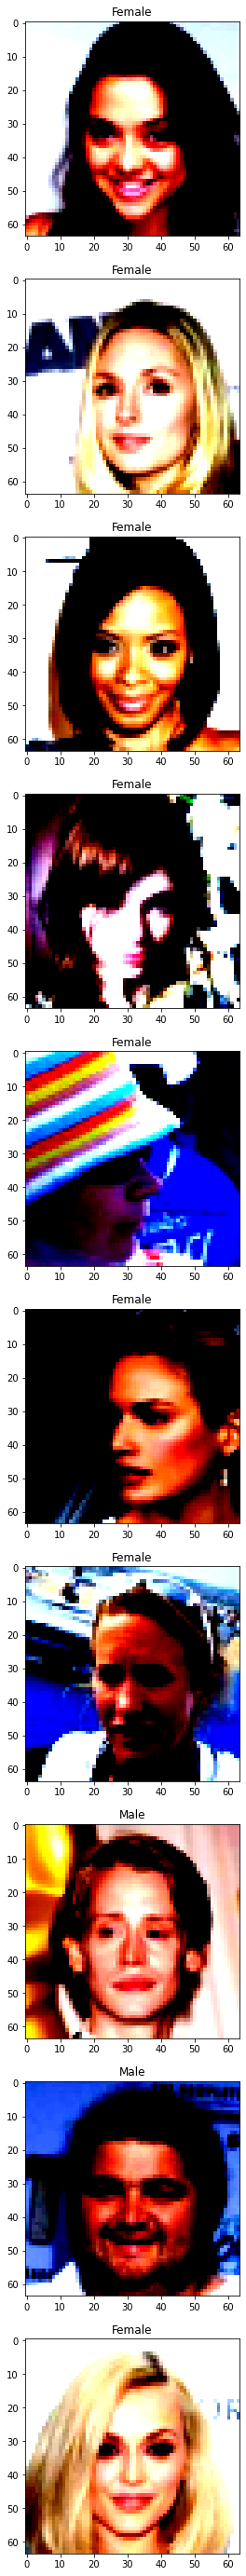

In [6]:
import matplotlib.pyplot as plt
import numpy as np

images_cnt = 10
plt.figure(figsize=(17,images_cnt*5))
for i, img_idx in enumerate(np.random.choice(range(len(dataset)), images_cnt)):
    img, target = dataset[img_idx]
    # attributes dict for a given image. Contains 40 attributes
    attributes = {k:v for k,v in zip(dataset.header, target['attributes'].detach().cpu().numpy())}
    plt.subplot(images_cnt,1,i+1)
    plt.title('Male' if target['attributes'][20] == 1 else 'Female')
    plt.imshow(img.detach().cpu().numpy().transpose(1,2,0))

# Этап 2. Обучение модели
В рамках данного задания предлагается реализовать и обучить StarGAN для генережки лиц с заданными аттрибутами
![](https://github.com/HSE-LAMBDA/DeepGenerativeModels/blob/spring-2023/homework/second/assets/stargan.png?raw=1)

Вам на выбор предлагается реализовать [StarGANv1](https://arxiv.org/pdf/1711.09020.pdf) (**до 4 баллов**) или [StarGANv2](https://arxiv.org/abs/1912.01865) (**до 7 баллов**)

In [7]:
import torch
import torch.nn.functional as F
import torch.nn as nn

class DownsampleBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample=False, normalize=True):
        super().__init__()
        self.downsample = downsample
        self.normalize = normalize
        self.conv_shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        if self.normalize:
            self.norm1 = nn.InstanceNorm2d(in_channels)
            self.norm2 = nn.InstanceNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, in_channels, 3, 1, 1)
        self.conv2 = nn.Conv2d(in_channels, out_channels, 3, 1, 1)
        self.act = nn.LeakyReLU(.2)

    
    def forward(self, x):
        shortcut = F.avg_pool2d(x, kernel_size=2) if self.downsample else x
        shortcut = self.conv_shortcut(shortcut)
        if self.normalize:
            x = self.norm1(x)
        x = self.act(x)
        x = self.conv1(x)
        x = F.avg_pool2d(x, kernel_size=2) if self.downsample else x
        if self.normalize:
            x = self.norm2(x)
        x = self.act(x)
        x = self.conv2(x)
        return (x + shortcut)/2**.5
        
class AdaIN(nn.Module):
    def __init__(self, channels, s_dim):
        super().__init__()
        self.fc_mean = nn.Linear(s_dim, channels)
        self.fc_std = nn.Linear(s_dim, channels)

    def forward(self, x, s):
        x_mean, x_std = x.mean((2,3), keepdim=True), x.std((2,3), keepdim=True)
        s_mean, s_std = self.fc_mean(s)[..., None, None], self.fc_std(s)[..., None, None]
        x_norm = (x - x_mean) / (x_std + 1e-5)
        return x_norm * (1 + s_std) + s_mean

class UpsampleBlock(nn.Module):
    def __init__(self, in_channels, out_channels, s_dim, upsample=False):
        super().__init__()
        self.upsample = upsample
        if self.upsample:
            self.up = nn.Upsample(scale_factor=2, mode='nearest')#, align_corners=False)
        self.conv_shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.norm1 = AdaIN(in_channels, s_dim)
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, 1, 1)
        self.norm2 = AdaIN(out_channels, s_dim)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, 1)
        self.act = nn.LeakyReLU(.2)

    
    def forward(self, x, s):
        shortcut = self.conv_shortcut(x)
        shortcut = self.up(shortcut) if self.upsample else shortcut
        x = self.norm1(x, s)
        x = self.act(x)
        x = self.conv1(x)
        x = self.up(x) if self.upsample else x

        x = self.norm2(x, s)
        x = self.act(x)
        x = self.conv2(x)
        return (x + shortcut) / 2**.5 # divice by sqrt{2} to keep unit variance
    
class Generator(nn.Module):
    def __init__(self, image_size=64, s_dim=64, init_channels=64*4):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, init_channels, 1, 1, 0), # 1x1 conv, 3 -> 16 channels
            DownsampleBlock(init_channels, init_channels*2, True), # 16 x 64 x 64 -> 32 x 32 x 32 
            DownsampleBlock(init_channels*2, init_channels*2, True), # -> 64 x 16 x 16
            DownsampleBlock(init_channels*2, init_channels*2, False), # -> 128 x 4 x 4
            DownsampleBlock(init_channels*2, init_channels*2, False), # -> 128 x 4 x 4
        )

        self.decoder = nn.Sequential(
            UpsampleBlock(init_channels*2, init_channels*2, s_dim, False), # -> 128 x 4 x 4
            UpsampleBlock(init_channels*2, init_channels*2, s_dim, False), # -> 128 x 4 x 4
            UpsampleBlock(init_channels*2, init_channels*2, s_dim, True), # -> 128 x 8 x 8
            UpsampleBlock(init_channels*2, init_channels, s_dim, True), # -> 64 x 16 x 16
        )
        self.final_conv = nn.Conv2d(init_channels, 3, 1, 1, 0) # -> 3 x 64 x 64

# adding one skip?
    def forward(self, x, s):
        input = x
        encoder_outputs = []
        for down in self.encoder:
            x = down(x)
            encoder_outputs.append(x)
        encoder_outputs.pop()
        for up in self.decoder:
            x = up(x, s) + encoder_outputs[-1]
            encoder_outputs.pop()
        x = self.final_conv(x)
        return x + input

class MappingNetwork(nn.Module):
    def __init__(self, latent_dim=16, s_dim=64, n_domains=2, hidden_dim=512):
        super().__init__()
        self.latent_dim = latent_dim
        self.s_dim = s_dim
        self.n_domains = n_domains
        self.shared = nn.Sequential(nn.Linear(latent_dim, hidden_dim),
                                    nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim),
                                    nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim),
                                    nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim),
                                    nn.ReLU(),
                                    )

        self.unshared = nn.ModuleList()
        for i in range(n_domains):
            self.unshared.append(nn.Sequential(nn.Linear(hidden_dim, hidden_dim),
                                    nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim),
                                    nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim),
                                    nn.ReLU(),
                                    nn.Linear(hidden_dim, s_dim)))

    def forward(self, z, y):
        z = self.shared(z) # N x hidden_dim
        styles = []
        for layer in self.unshared:
            styles.append(layer(z))
        styles = torch.stack(styles, dim=1)  # N x n_domains x s_dim
        return styles.gather(dim=1, index=y.view(-1, 1, 1).expand(-1,-1, styles.shape[2])).squeeze(1)

class StyleEncoder(nn.Module):
    def __init__(self, image_size=64, s_dim=64, n_domains=2, init_channels=64*4):
        super().__init__()
        self.shared = nn.Sequential(nn.Conv2d(3, init_channels, 1, 1, 0),
                                    DownsampleBlock(init_channels, init_channels*2, downsample=True, normalize=False),
                                    DownsampleBlock(init_channels*2, init_channels*2, downsample=True, normalize=False),
                                    DownsampleBlock(init_channels*2, init_channels*2, downsample=True, normalize=False),
                                    DownsampleBlock(init_channels*2, init_channels*2, downsample=True, normalize=False),
                                    nn.LeakyReLU(.2),
                                    nn.Conv2d(init_channels*2, init_channels*2, 4, 1, 0),
                                    nn.LeakyReLU(.2)
                                    )

        self.unshared = nn.ModuleList()
        for i in range(n_domains):
            self.unshared.append(nn.Linear(init_channels*2, s_dim))

    def forward(self, x, y):
        x = self.shared(x)
        x = x.view(x.shape[0], -1)
        styles = []
        for layer in self.unshared:
            styles.append(layer(x))
        styles = torch.stack(styles, dim=1) # N x n_domains x s_dim 
        return styles.gather(dim=1, index=y.view(-1, 1, 1).expand(-1, -1, styles.shape[2])).squeeze(1)

class Discriminator(nn.Module):
    def __init__(self, image_size=64, n_domains=2, init_channels=64*4):
        super().__init__()
        self.shared = self.shared = nn.Sequential(nn.Conv2d(3, init_channels, 1, 1, 0),
                                    DownsampleBlock(init_channels, init_channels*2, downsample=True, normalize=False),
                                    DownsampleBlock(init_channels*2, init_channels*2, downsample=True, normalize=False),
                                    DownsampleBlock(init_channels*2, init_channels*2, downsample=True, normalize=False),
                                    DownsampleBlock(init_channels*2, init_channels*2, downsample=True, normalize=False),
                                    nn.LeakyReLU(.2),
                                    nn.Conv2d(init_channels*2, init_channels*2, 4, 1, 0),
                                    nn.LeakyReLU(.2),
                                    )

        self.fc = nn.Linear(init_channels*2, n_domains)

    def forward(self, x, y):
        x = self.shared(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x) # N x n_domains
        return x.gather(dim=1, index=y.view(-1, 1)).squeeze(1)


In [8]:
# dummy = torch.randn((20, 3, 64, 64))
# dummy_s = torch.randn((20, 23))
# dummy_z = torch.randn((20, 16))
# dummy_y = torch.randint(0, 2, (20,))
# gen = Generator(s_dim=23, init_channels=19)
# se = StyleEncoder(s_dim=23, init_channels=19)
# mn = MappingNetwork(s_dim=23, hidden_dim=31)
# dis = Discriminator(init_channels=19)
# assert gen(dummy, dummy_s).shape == dummy.shape
# assert se(dummy, dummy_y).shape == (dummy.shape[0], 23)
# assert mn(dummy_z, dummy_y).shape == (dummy.shape[0], 23)
# assert dis(dummy, dummy_y).shape == (dummy.shape[0],)

In [9]:
# x has shape N x 3 x 64 x 64
# y has shape N
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'

def generator_loss(generator, mapping_network, style_encoder, discriminator, x, y, lambda_ds=1, x_refs=None, y_refs=None):
    N = x.shape[0]
    if x_refs is None:
        z1 = torch.randn((N, mapping_network.latent_dim), device=device)
        y1 = torch.randint_like(y, 0, mapping_network.n_domains, device=device)
        z2 = torch.randn((N, mapping_network.latent_dim), device=device)
        y2 = torch.randint_like(y, 0, mapping_network.n_domains, device=device)
        s1 = mapping_network(z1, y1)
        s2 = mapping_network(z2, y2)
    else:
        y1, y2 = y_refs
        x1, x2 = x_refs
        s1, s2 = style_encoder(x1, y1), style_encoder(x2, y2)

    # images generated by generator
    fake_images = generator(x, s1)

    discriminator_fake = discriminator(fake_images, y1) 
    # E [log D_y(x)] + E [log (1 − D_y'(G(x, s')))]
    # the first term only depends on discriminator, so is constant here
    L_adv = F.binary_cross_entropy_with_logits(discriminator_fake,
                                               torch.ones_like(discriminator_fake))

    extracted_style = style_encoder(fake_images, y1)
    L_sty = F.l1_loss(s1, extracted_style)

    fake_images_other = generator(x, s2)
    L_ds = F.l1_loss(fake_images, fake_images_other)

    extracted_original_style = style_encoder(x, y)
    x_decoded = generator(fake_images, extracted_original_style)
    L_cyc = F.l1_loss(x_decoded, x)

    return L_adv + L_sty - lambda_ds * L_ds + L_cyc, {"L_adv": L_adv.item(),
                                                      "L_sty": L_sty.item(),
                                                      "L_ds": L_ds.item(),
                                                      "L_cyc": L_cyc.item()}

def discriminator_loss(generator, mapping_network, style_encoder, discriminator, x, y, x_ref=None, y_ref=None):
    N = x.shape[0]
    if x_ref is None:
        z1 = torch.randn((N, mapping_network.latent_dim), device=device)
        y1 = torch.randint_like(y, 0, mapping_network.n_domains, device=device)
        s1 = mapping_network(z1, y1)
    else:
        y1 = y_ref
        s1 = style_encoder(x_ref, y_ref)
    # images generated by generator
    fake_images = generator(x, s1)
    # "It penalizes the discriminator from deviating from the Nash Equilibrium via penalizing the gradient on real data alone:""
    # only real data needs grad
    x.requires_grad_()
    discriminator_fake = discriminator(fake_images, y1) 
    discriminator_real = discriminator(x, y) 
    # E [log D_y(x)] + E [log (1 − D_y'(G(x, s')))]
    # for discriminator, we are maximising this, which we can achieve by flipping labels 
    # (it was also mentioned in the seminar that this helps vanishing gradients, see https://github.com/soumith/ganhacks)
    L_adv = F.binary_cross_entropy_with_logits(discriminator_fake,
                                               torch.zeros_like(discriminator_fake))\
                                               +\
                                               F.binary_cross_entropy_with_logits(discriminator_real,
                                               torch.ones_like(discriminator_real))

    # L_sty, L_ds and L_cyc do not depend on discriminator, so we can exclude them
    # however, we need to include R1 regularization as it says in paper
    L_reg = R1_regularization(discriminator_real, x)
    return L_adv + L_reg

# see https://github.com/ChristophReich1996/Dirac-GAN/blob/decb8283d919640057c50ff5a1ba01b93ed86332/dirac_gan/loss.py#L292
def R1_regularization(prediction_real, real_sample):
        grad_real = torch.autograd.grad(outputs=prediction_real.sum(), inputs=real_sample, create_graph=True)[0]
        return grad_real.pow(2).view(grad_real.shape[0], -1).sum(1).mean()





In [10]:
device = 'cuda:1'
#! nvidia-smi

In [9]:
generator = Generator().to(device)
generator_opt = torch.optim.Adam(generator.parameters(), betas=(0, .99), lr=1e-4)
discriminator = Discriminator().to(device)
discriminator_opt = torch.optim.Adam(discriminator.parameters(), betas=(0, .99), lr=1e-4)
style_encoder = StyleEncoder().to(device)
style_encoder_opt = torch.optim.Adam(style_encoder.parameters(), betas=(0, .99), lr=1e-4)
mapping_network = MappingNetwork().to(device)
mapping_network_opt = torch.optim.Adam(mapping_network.parameters(), betas = (0, .99), lr=1e-6)
# image_size=64
# s_dim=16 
# init_channels=64*2
# latent_dim=8
# n_domains=2
# hidden_dim=64*2
# generator = Generator(image_size=image_size, s_dim=s_dim, init_channels=init_channels).to(device)
# generator_opt = torch.optim.Adam(generator.parameters(), betas=(0, .99), lr=1e-4)
# discriminator = Discriminator(image_size=image_size, n_domains=n_domains, init_channels=init_channels).to(device)
# discriminator_opt = torch.optim.Adam(discriminator.parameters(), betas=(0, .99), lr=1e-4)
# style_encoder = StyleEncoder(s_dim=s_dim,
#                              image_size=image_size, init_channels=init_channels,  n_domains=n_domains).to(device)
# style_encoder_opt = torch.optim.Adam(style_encoder.parameters(), betas=(0, .99), lr=1e-4)
# mapping_network = MappingNetwork(latent_dim=latent_dim, s_dim=s_dim, n_domains=n_domains, hidden_dim=hidden_dim).to(device)
# mapping_network_opt = torch.optim.Adam(mapping_network.parameters(), betas = (0, .99), lr=1e-6)

KeyboardInterrupt: 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torch
def preprocess_images(images, minmax=False):
    if minmax:
        m = images.min(axis=(0, 3), keepdims=True)
        M = images.max(axis=(0,3), keepdims=True)
        return (images-m)/(M-m)
    mean = np.array([0.485, 0.456, 0.406])
    std=np.array([0.229, 0.224, 0.225])
    return np.clip(images * std + mean, 0, 1)
def sample_images(nrow, ncol, generator, mapping_network, x, y):
    if len(x) < nrow*ncol:
        return
    with torch.no_grad():
        x = x[:nrow*ncol]
        z_sample = torch.randn((nrow*ncol, mapping_network.latent_dim), device=device)
        y_sample = torch.randint(0, mapping_network.n_domains, (nrow*ncol,), device=device)
        target_style = mapping_network(z_sample, y_sample)
        images = generator(x, target_style)
        fake_images = preprocess_images(images.data.cpu().numpy().transpose([0, 2, 3, 1]))
        real_images = preprocess_images(x.data.cpu().numpy().transpose([0, 2, 3, 1]))
        plt.figure(figsize=(15, 10))
        for i in range(nrow*ncol):
            plt.subplot(nrow, ncol*2, 2*i+1)
            plt.title(f'original ({"male" if y[i] else "female"})')
            plt.imshow(real_images[i], interpolation="none")
            plt.subplot(nrow, ncol*2, 2*i+2)
            plt.title(f'generated ({"male" if y_sample[i] else "female"})')
            plt.imshow(fake_images[i], interpolation="none")
        plt.show()
        return fake_images, y_sample, real_images, y

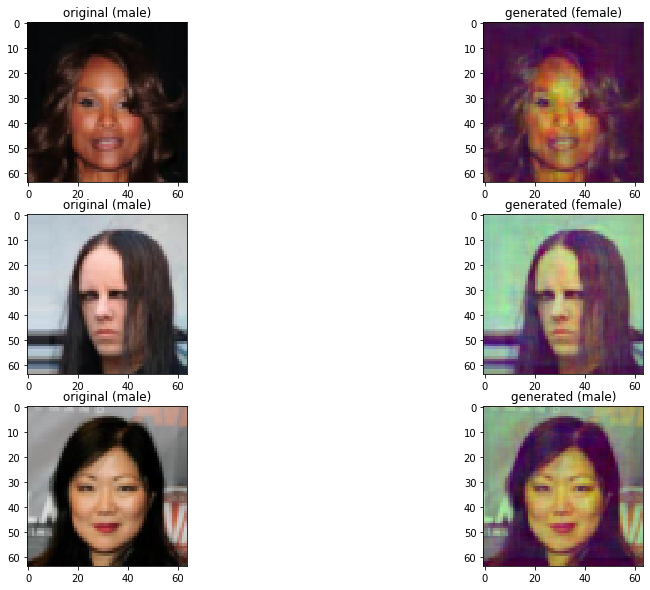

In [26]:
x, y = next(iter(dataloader))
y = y['attributes'][:, 20]
_ = sample_images(3, 1, generator, mapping_network, x.to(device), y)

In [27]:
from tqdm import tqdm
from IPython import display
NUM_EPOCHS=10
import gc
with torch.cuda.device(device):
    torch.cuda.empty_cache()
    gc.collect()
batch_size=8
lambda_ds=1# sorry, but this term just ruins everything
dataloader = torch.utils.data.DataLoader(dataset,
                                        batch_size=batch_size,
                                                num_workers=0,
                                                pin_memory=True,
                                                shuffle=True)

male_idx = dataset.header.index('Male')
log = {"L_adv": [],
    "L_sty": [],
    "L_ds": [],
    "L_cyc": []}

In [28]:
import wandb
wandb.init(project="gan-hw2-fixed-loss")

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Currently logged in as: irodionzaytsev. Use `wandb login --relogin` to force relogin


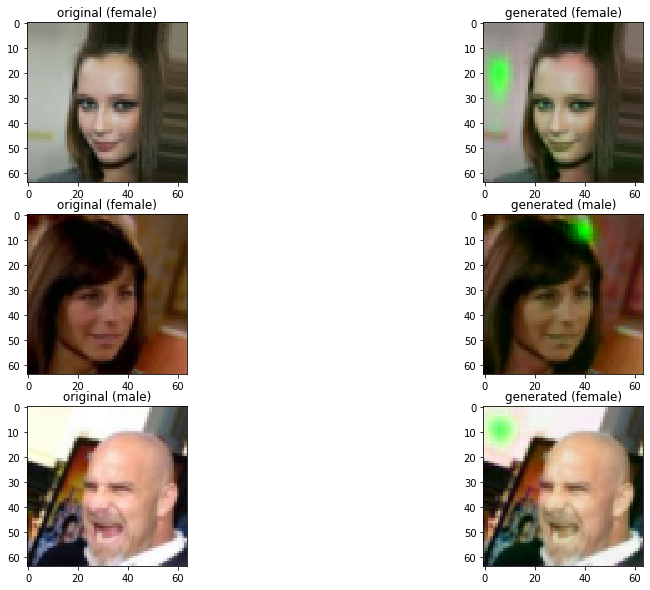

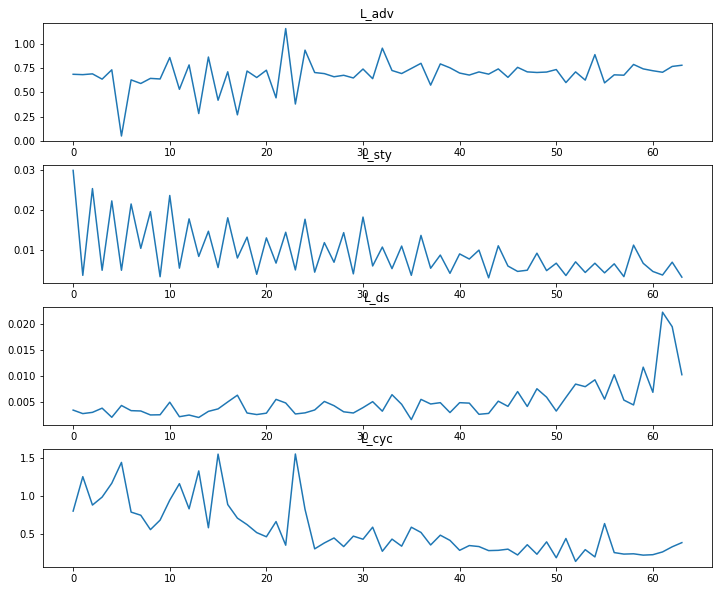

35it [01:12,  2.05s/it]

In [ ]:
# Had to ad clipping, because without it, the learning was extremely unstalble
#clip=.01
for epoch in range(NUM_EPOCHS):
    for iteration, (x, y) in tqdm(enumerate(dataloader)):
        y = (y['attributes'][:, male_idx] + 1) // 2
        x, y = x.to(device), y.to(device)

        # train with samples
        loss, components = generator_loss(generator, mapping_network, style_encoder, discriminator, x, y, lambda_ds)
        generator_opt.zero_grad()
        style_encoder_opt.zero_grad()
        mapping_network_opt.zero_grad()
        loss.backward()
#         torch.nn.utils.clip_grad_norm_(generator.parameters(), clip)
#         torch.nn.utils.clip_grad_norm_(style_encoder.parameters(), clip)
#         torch.nn.utils.clip_grad_norm_(mapping_network.parameters(), clip)
        generator_opt.step()
        style_encoder_opt.step()
        mapping_network_opt.step()
        for key, item in components.items():
                    log[key].append(item)
                    wandb.log({key:item})
        
        # train with references
        x1, y1 = next(iter(dataloader))
        x2, y2 = next(iter(dataloader))
        y1 = (y1['attributes'][:, male_idx] + 1) // 2
        y2 = (y2['attributes'][:, male_idx] + 1) // 2
        x1, y1 = x1.to(device), y1.to(device)
        x2, y2 = x2.to(device), y2.to(device)
        if x.shape == x1.shape and x2.shape == x.shape:
            loss, components = generator_loss(generator, mapping_network, style_encoder, discriminator,
                                              x, y, lambda_ds, x_refs=(x1, x2), y_refs=(y1, y2))
            for key, item in components.items():
                    log[key].append(item)
                    wandb.log({key + " (reference)":item})
            # mapping network is not involved with reference images
            # shouldn't be training style encoder either, 
            # but we aren't going to step style encoder
            generator_opt.zero_grad()
            #just train generator, because that's what they do in starganv2
            #style_encoder_opt.zero_grad()
            loss.backward()
#             torch.nn.utils.clip_grad_norm_(generator.parameters(), clip)
#             torch.nn.utils.clip_grad_norm_(style_encoder.parameters(), clip)

            generator_opt.step()
            #style_encoder_opt.step()
                
        
        loss = discriminator_loss(generator, mapping_network, style_encoder, discriminator, x, y)
        discriminator_opt.zero_grad()
        loss.backward()
        #torch.nn.utils.clip_grad_norm_(discriminator.parameters(), clip)
        discriminator_opt.step()
        if x.shape == x1.shape and x2.shape == x.shape:
            loss = discriminator_loss(generator, mapping_network, style_encoder, discriminator, x, y, x1, y1)
            discriminator_opt.zero_grad()
            loss.backward()
            #torch.nn.utils.clip_grad_norm_(discriminator.parameters(), clip)
            discriminator_opt.step()
            wandb.log({"Discriminator loss": loss.item()})
        
        if iteration % 10 == 1:
            display.clear_output(wait=True)
            fake, y_fake, real, y_real = sample_images(3, 1, generator, mapping_network, x, y)
            for image, male in zip(real, y_real):
                f = wandb.Image(image, caption="male" if male else "female")
                wandb.log({"Real": f})
            for image, male in zip(fake, y_fake):
                f = wandb.Image(image, caption="male" if male else "female")
                wandb.log({"Generated": f})
            plt.figure(figsize=(12, 10))
            for i, (key, history) in enumerate(log.items()):
                            plt.subplot(len(log), 1, i+1)
                            plt.title(key)
                            plt.plot(history)
            plt.show()
        lambda_ds = max(lambda_ds - batch_size / 800_000, 0)
        wandb.log({"lambda_ds":lambda_ds})
        
    !mkdir -p ckpts
    torch.save(generator.state_dict(), f'ckpts/generator{epoch}.pth')
    torch.save(style_encoder.state_dict(), f'ckpts/style_encoder{epoch}.pth')
    torch.save(mapping_network.state_dict(), f'ckpts/mapping_network{epoch}.pth')
    torch.save(discriminator.state_dict(), f'ckpts/discriminator{epoch}.pth')
        


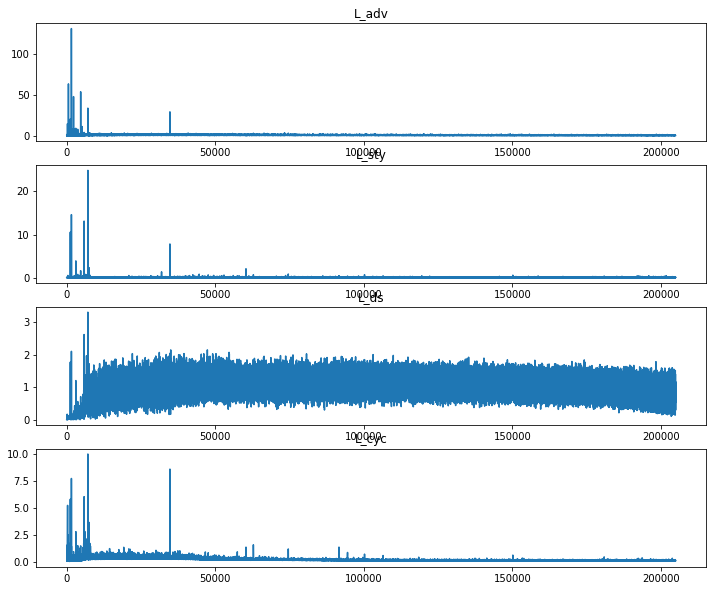

In [30]:
plt.figure(figsize=(12, 10))
for i, (key, history) in enumerate(log.items()):
    plt.subplot(len(log), 1, i+1)
    plt.title(key)
    plt.plot(history)

In [32]:
torch.save(generator.state_dict(), f'ckpts/generator_final.pth')
torch.save(style_encoder.state_dict(), f'ckpts/style_encoder_final.pth')
torch.save(mapping_network.state_dict(), f'ckpts/mapping_network_final.pth')
torch.save(discriminator.state_dict(), f'ckpts/discriminator_final.pth')

In [13]:
device='cuda'
generator = Generator().to(device)
discriminator = Discriminator().to(device)
style_encoder = StyleEncoder().to(device)
mapping_network = MappingNetwork().to(device)
generator.load_state_dict(torch.load(f'ckpts/generator1.pth', map_location=device))
style_encoder.load_state_dict(torch.load(f'ckpts/style_encoder1.pth', map_location=device))
mapping_network.load_state_dict(torch.load(f'ckpts/mapping_network1.pth', map_location=device))
discriminator.load_state_dict(torch.load(f'ckpts/discriminator1.pth', map_location=device))

<All keys matched successfully>

# Evaluation

In [18]:
lpips = LPIPS()

In [23]:
#!g1.1
from tqdm.auto import trange
test_iters = 100
values_ref = []
values_gen = []
batch_size = 16
male_idx = dataset.header.index('Male')
dataloader = torch.utils.data.DataLoader(dataset,
                                        batch_size=batch_size,
                                                num_workers=0,
                                                pin_memory=True,
                                                shuffle=True)
with torch.no_grad():
    for i in trange(test_iters):
        # calculate lpips for reference-based generation
        x1, y1 = next(iter(dataloader))
    
        x2, y2 = next(iter(dataloader))
        # original
        y1 = (y1['attributes'][:, male_idx]+1) // 2
        x1, y1 = x1.to(device), y1.to(device)
        # reference
        y2 = (y2['attributes'][:, male_idx]+1) // 2
        x2, y2 =  x2.to(device), y2.to(device)
        s2 = style_encoder(x2, y2)
        # fake
        x_gen = generator(x1.to(device), s2.to(device))
        values_ref.append(lpips(x_gen[:batch_size // 2].to('cpu'), x_gen[batch_size // 2:].to('cpu')).squeeze().item())
        
        # calculate lpips for latent samples
        z = torch.randn((batch_size, mapping_network.latent_dim), device=device)
        y = torch.randint_like(y1, 0, mapping_network.n_domains, device=device)

        s = mapping_network(z, y)
        x_gen = generator(x1, s)

        values_gen.append(lpips(x_gen[:batch_size // 2].to('cpu'), x_gen[batch_size // 2:].to('cpu')).squeeze().item())



  0%|          | 0/100 [00:00<?, ?it/s]

In [24]:
np.mean(values_ref), np.mean(values_gen)

(2.32997104883194, 2.345665142536163)

In [25]:
np.var(values_ref), np.var(values_gen)

(0.050829838412976065, 0.03606769236963907)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


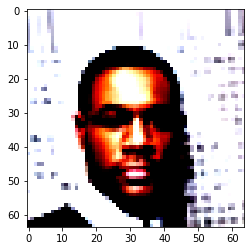

In [28]:
#!g1.1
with torch.no_grad():
    z_trg = torch.randn((batch_size, 16)).to(device)
    x_real, _ = next(iter(dataloader))
    x_real = x_real.to(device)
    y_trg = torch.tensor(np.random.choice(np.arange(2), size=batch_size)).to(device)
    s_trg = mapping_network(z_trg, y_trg)
#     s_trg = nets.style_encoder(x_ref2, y_trg)
    x_fake = generator(x_real, s_trg)
plt.imshow(x_fake[1].permute(1,2,0).detach().cpu().numpy())

# Этап 3(\*). Дополнительный анализ

* Анализ латентного пространства и визуально качественный результат - **2 балла**
* Текстовое ревью решения и предложения возможных улучшений - **1 балл**

In [39]:
#!g1.1
from PIL import Image
transform=transforms.Compose([
    transforms.Resize(args.img_size),
    transforms.CenterCrop(args.img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])
def image_to_tensor(image_name):
    prefix='pictures/'
    image = Image.open(prefix+image_name)
    tensor = transform(image)
    return tensor[None, ...]
    


# target_male=1 for male, 0 for female
def infer(source_image, target_male, style_image=None):
    with torch.no_grad():
        x = image_to_tensor(source_image)
        if style_image is None:
            z = torch.randn((1, mapping_network.latent_dim), device=device)
            y = torch.tensor(target_male, device=device)
            target_style = mapping_network(z, y)
            x_gen = generator(x.to(device), target_style).data.cpu().numpy().transpose([0, 2, 3, 1])
            x_gen = preprocess_images(x_gen).squeeze(0)
            plt.figure(figsize=(10, 5))
            plt.subplot(1,2,1)
            plt.title(f'original ({source_image})')
            plt.imshow(preprocess_images(x.numpy().transpose([0, 2, 3, 1])).squeeze(0))
            plt.subplot(1,2,2)
            plt.title(f'generated using sampled style, {"male" if target_male else "female"}')
            plt.imshow(x_gen)
        else:
            x_style = image_to_tensor(style_image)
            y = torch.tensor(target_male, device=device)
            target_style = style_encoder(x_style.to(device), y)
            x_gen = generator(x.to(device), target_style).data.cpu().numpy().transpose([0, 2, 3, 1])
            x_gen = preprocess_images(x_gen).squeeze(0)
            plt.figure(figsize=(10, 5))
            plt.subplot(1,3,1)
            plt.title(f'original ({source_image})')
            plt.imshow(preprocess_images(x.numpy().transpose([0, 2, 3, 1])).squeeze(0))
            plt.subplot(1,3,2)
            plt.title(f'style image ({style_image})')
            plt.imshow(preprocess_images(x_style.numpy().transpose([0, 2, 3, 1])).squeeze(0))
            plt.subplot(1,3,3)
            plt.title(f'generated using style image')
            plt.imshow(x_gen)
        return x_gen
        

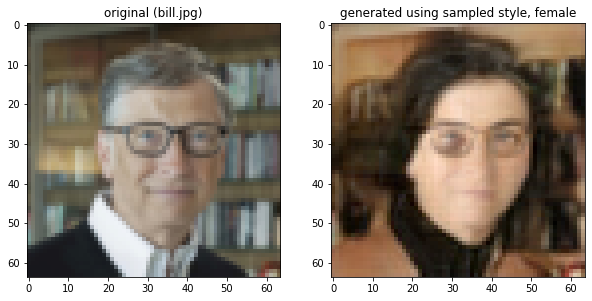

In [19]:
infer('bill.jpg', 0)

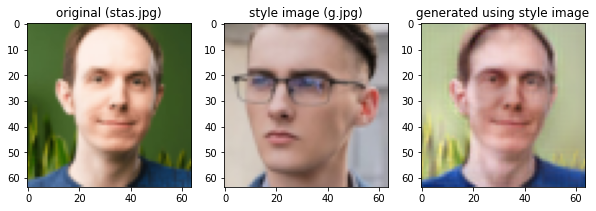

In [20]:
infer('g.jpg')

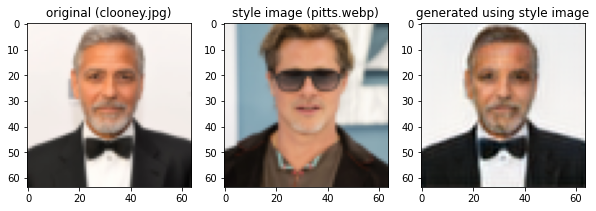

In [21]:
infer('clooney.jpg', 1, 'pitts.webp')

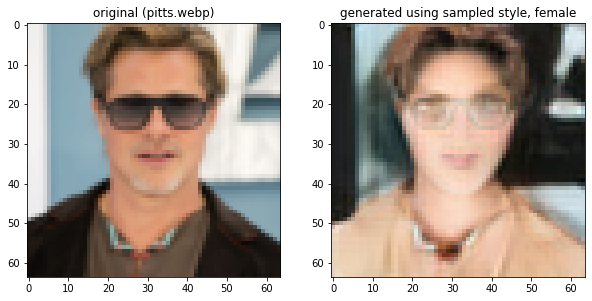

In [40]:
pf = infer('pitts.webp', 0)

In [47]:
import imageio
imageio.imwrite('pictures/pittf.jpg', (pf*255).astype('uint8'))

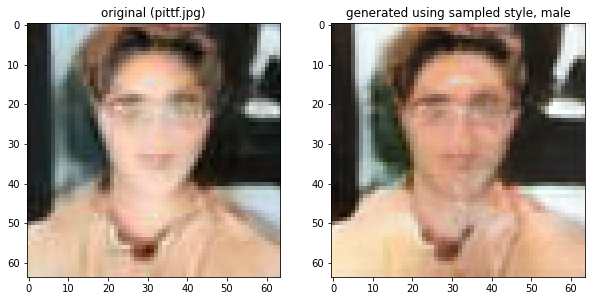

In [48]:
_ = infer('pittf.jpg', 1)

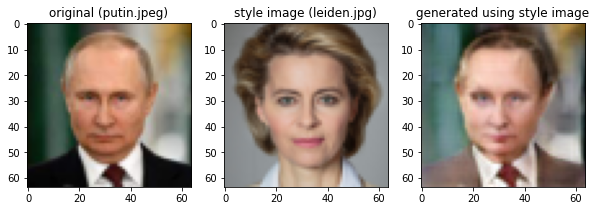

In [22]:
infer('putin.jpeg', 0, 'leiden.jpg')